### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [1]:
import os

In [181]:
# change directory for the one with libraries, etc.
path = \
    ('/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/'
     'Мой диск/Data Science Projects/economy-rus/')

os.chdir(path + 'notebooks/')

# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

# import libraries, etc.
%run load.ipynb

# run files with data export
# %run 009.1-009.3_PI-Consumers-Prices.ipynb
# %run 010.1-010.4_PI-Agriculture-Prices.ipynb

# and go back to current directory ('current_path' variable is assigned in _load.ipynb)
os.chdir(current_path)

In [3]:
economics_data = loadit(
    'economics_data',
    dir= path + 'data/00-Datasets/'
)

In [4]:
len(economics_data)

95

In [5]:
save_plot_dir = path + 'docs/img'

In [189]:
xlim = [dt.date(2021, 1, 1), dt.date(2024, 4, 1)]

### Средние цены производителей сельскохозяйственной продукции 2010-2022

In [6]:
prices_producers = economics_data['10.1']

In [7]:
prices_producers.head()

,пшеница,кукуруза,ячмень,рожь,овес,просо,гречиха,овощи бобовые сушеные (культуры зернобобовые),семена подсолнечника,капуста всех сортов,...,морковь столовая,лук репчатый,свекла столовая,картофель,крупный рогатый скот,овцы и козы,свиньи,птица сельскохозяйственная живая,молоко сырое крупного рогатого скота,яйца куриные в скорлупе свежие
2010,3867.0,4681.0,3395.0,3411.0,3596.0,3832.0,8153.0,5581.0,10605.0,11029.0,...,11309.0,9719.0,8298.0,9501.0,55951.0,45174.0,69748.0,52966.0,12370.0,2341.0
2011,5108.0,5917.0,4986.0,3924.0,4495.0,5158.0,15676.0,6991.0,11364.0,10842.0,...,12232.0,9101.0,11225.0,10308.0,64989.0,50902.0,76386.0,54547.0,14135.0,2537.0
2012,6409.0,6751.0,5903.0,4519.0,4597.0,3982.0,10537.0,8335.0,12458.0,6503.0,...,7503.0,5730.0,6614.0,7642.0,73097.0,62902.0,83243.0,55173.0,13604.0,2704.0
2013,6715.0,6581.0,6376.0,4912.0,5782.0,5241.0,7205.0,8395.0,12024.0,8227.0,...,9812.0,7306.0,8981.0,9447.0,72128.0,74286.0,71675.0,54358.0,15875.0,3197.0
2014,6849.0,5799.0,5516.0,4691.0,4965.0,5609.0,8370.0,8458.0,11534.0,10123.0,...,11481.0,10595.0,10403.0,12898.0,74405.0,70978.0,94081.0,63654.0,19614.0,3407.0


### Сравнение цен производителей и потребительских цен на некоторые виды товаров 2021-2023

In [8]:
prices_food_types = [
    'горох сушеный', 'гречиха', 'зерновые и зернобобовые культуры',
    'капуста всех сортов', 'картофель', 'крупный рогатый скот', 'кукуруза',
    'культуры зерновые', 'лук репчатый', 'молоко сырое крупного рогатого скота',
    'морковь столовая', 'овес', 'овощи', 'огурцы', 'птица сельскохозяйственная живая',
    'пшеница', 'пшеница твердая', 'рис нешелушеный', 'рожь', 'свекла столовая',
    'свиньи', 'семена подсолнечника', 'томаты (помидоры)', 'яйца куриные в скорлупе свежие'
]

In [9]:
prices_food_2021 = economics_data['10.2'].copy()
prices_food_2022 = economics_data['10.3'].copy()
prices_food_2023 = economics_data['10.4'].copy()
prices_food_2024 = economics_data['13.01'].copy()

In [10]:
prices_food_2021_consumers = economics_data['9.1'].copy()
prices_food_2022_consumers = economics_data['9.2'].copy()
prices_food_2023_consumers = economics_data['9.3'].copy()
prices_food_2024_consumers = economics_data['13.02'].copy()

#### Пшеница и хлеб

In [11]:
wheat_2021 = prices_food_2021['пшеница'].copy()
wheat_2022 = prices_food_2022['пшеница'].copy()
wheat_2023 = prices_food_2023['пшеница'].copy()
wheat_2024 = prices_food_2024['пшеница'].copy()

In [12]:
wheat = pd.concat([
    wheat_2021, wheat_2022, wheat_2023, wheat_2024], axis=0)

In [13]:
# from tonns to kilogramms
wheat = 0.001 * wheat

In [14]:
# transform indexes to datetime
wheat.index = [to_date(x) for x in wheat.index]

In [15]:
wheat.tail()

2023-10-01    10.8850
2023-11-01    10.3990
2023-12-01    10.2950
2024-01-01    10.3767
2024-02-01    10.4707
Name: пшеница, dtype: float64

In [16]:
wheat_durum_2021 = prices_food_2021['пшеница твердая'].copy()
wheat_durum_2022 = prices_food_2022['пшеница твердая'].copy()
wheat_durum_2023 = prices_food_2023['пшеница твердая'].copy()

In [17]:
wheat_durum = pd.concat([
    wheat_durum_2021, wheat_durum_2022, wheat_durum_2023], axis=0)

In [18]:
# from tonns to kilogramms
wheat_durum = 0.001 * wheat_durum

In [19]:
# transform indexes to datetime
wheat_durum.index = [to_date(x) for x in wheat_durum.index]

In [20]:
wheat_durum.tail()

2023-08-01    15.217
2023-09-01    17.786
2023-10-01    17.366
2023-11-01    19.267
2023-12-01    21.866
Name: пшеница твердая, dtype: float64

In [21]:
wheat_other_2021 = prices_food_2021['пшеница, кроме твердой пшеницы'].copy()
wheat_other_2022 = prices_food_2022['пшеница, кроме твердой пшеницы'].copy()
wheat_other_2023 = prices_food_2023['пшеница, кроме твердой пшеницы'].copy()

In [22]:
wheat_other = pd.concat([
    wheat_2021, wheat_2022, wheat_2023], axis=0)

In [23]:
# from tonns to kilogramms
wheat_other = 0.001 * wheat_other

In [24]:
# transform indexes to datetime
wheat_other.index = [to_date(x) for x in wheat_other.index]

In [25]:
wheat_other.tail()

2023-08-01    11.411
2023-09-01    11.063
2023-10-01    10.885
2023-11-01    10.399
2023-12-01    10.295
Name: пшеница, dtype: float64

В 2022 году изменена номенклатура для хлеба.  

В 2021:
- хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг
- хлеб и булочные изделия из пшеничной муки высшего сорта, кг


В 2022:
- хлеб и булочные изделия из пшеничной муки различных сортов, кг

В конечном итоге, цена для 2021 года считается как средняя от  'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг' 
и 'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'. На графике цена за 2021 год обозначены светлым тоном.

In [26]:
bread_2021 = pd.concat(
    [prices_food_2021_consumers['хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг'],
    prices_food_2021_consumers['хлеб и булочные изделия из пшеничной муки высшего сорта, кг']],
    axis=1
)
bread_2021 = bread_2021.mean(axis=1)

In [27]:
bread_2021.tail()

August 2021        73.14
September 2021     73.55
October 2021      74.695
November 2021      76.23
December 2021      77.24
dtype: object

In [28]:
bread_2022 = prices_food_2022_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()
bread_2023 = prices_food_2023_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()
bread_2024 = prices_food_2024_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()

In [29]:
bread_2022.tail()

August 2022       84.83
September 2022    85.07
October 2022      85.08
November 2022     85.05
December 2022     85.21
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [30]:
bread_2023.tail()

August 2023       86.31
September 2023    87.22
October 2023      88.65
November 2023     90.09
December 2023     90.76
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [31]:
bread_2024.tail()

January 2024     92.03
February 2024    92.41
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [32]:
bread = pd.concat([
    bread_2021, bread_2022, bread_2023, bread_2024], axis=0)

In [33]:
# transform indexes to datetime
bread.index = [to_date(x) for x in bread.index]

In [34]:
bread.tail()

2023-10-01    88.65
2023-11-01    90.09
2023-12-01    90.76
2024-01-01    92.03
2024-02-01    92.41
dtype: object

#### Plots

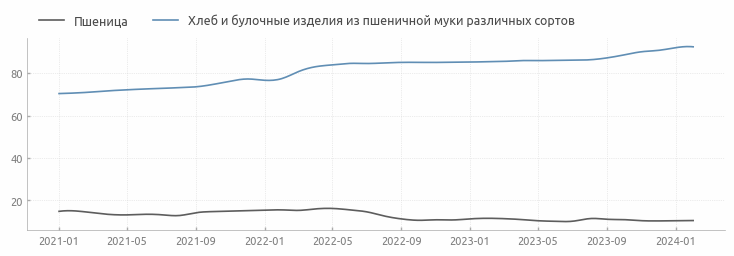

In [35]:
plt.plot(
    smoothed(wheat, datetime_index=True), color=palette[0],
    label='Пшеница')
plt.plot(
    smoothed(bread, datetime_index=True), color=palette[2],
    label='Хлеб и булочные изделия из пшеничной муки различных сортов')
plt.legend(**legend_inline, ncols=2)

Images 'price-bread.png' and 'price-bread.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


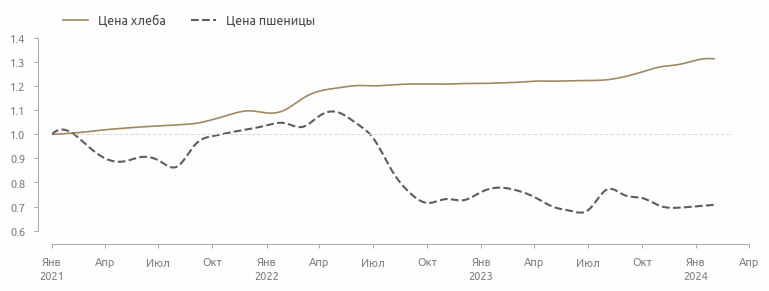

In [202]:
fig = plt.figure()
plt.plot(
    smoothed(normalized_by_first(bread), datetime_index=True),
    color=alpha_color(palette[6], 1),
    label='Цена хлеба'
)
plt.plot(
    smoothed(normalized_by_first(wheat), datetime_index=True),
    lw=1.5, ls='--', color=palette[0], label='Цена пшеницы')
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-1], alpha=1, zorder=10
)
plt.legend(**legend_inline, ncols=2)
plt.xlim(plt.gca().get_xticks()[0], plt.gca().get_xticks()[-1])
# plt.title('Нормализованная цена хлеба', **title_inline)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_bottom=10, offset_left=10)

savefig('price-bread', dir=save_plot_dir, dpi=100)

In [37]:
set_location()

In [38]:
bread_structure = {
    'сырье': 24.97,
    'расходы на производство': 27.34,
    'коммерческие расходы': 7.60,
    'прибыль предприятий, осуществляющих производство': 11.88,
    'НДС предприятий, осуществляющих производство': 7.19,
    'другие виды налогов': 0.03,
    'плата за доставку продукции (товара) покупателям': 0.76,
    'надбавка розничной торговли': 13.57,
    'НДС организациий розничной торговли': 6.66
}

In [39]:
sum(list(bread_structure.values()))

100.0

In [40]:
bread_structure_df = pd.DataFrame([bread_structure])

In [41]:
bread_structure_df

,сырье,расходы на производство,коммерческие расходы,"прибыль предприятий, осуществляющих производство","НДС предприятий, осуществляющих производство",другие виды налогов,плата за доставку продукции (товара) покупателям,надбавка розничной торговли,НДС организациий розничной торговли
0,24.97,27.34,7.6,11.88,7.19,0.03,0.76,13.57,6.66


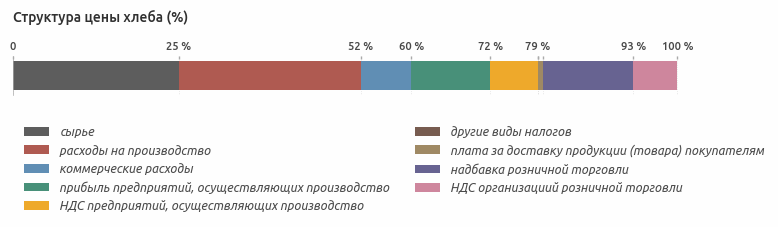

Images 'price-bread-structure.png' and 'price-bread-structure.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


In [42]:
columns_list = bread_structure_df.columns.tolist()
xticks = list(bread_structure.values())
xticks_cum = list(np.cumsum(xticks) - xticks)
xticks_cum.append(100)
xticks_labels = [str(int(round(x, 0))) + ' %' for x in xticks_cum]
xticks_labels[6:8] = ' ' * 2
xticks_labels[0] = '0'

fig = plt.figure(figsize=(9, 0.5))

zip_ = (columns_list, range(len(columns_list)))
for column, color in zip(*zip_):
    iloc_column = columns_list.index(column)
    previous_values_sum = bread_structure_df.iloc[:, :iloc_column].sum(axis=1)
    current_value = bread_structure_df[column].item()
    plt.barh(
        y=0.5, width=current_value, left=previous_values_sum,
        height=0.75, color=palette[color],
        label=column)

plt.xticks(xticks_cum, labels=xticks_labels, weight='medium', color=palette[-5])
plt.legend(
    loc='upper left', bbox_to_anchor=(0, -0.5),
    frameon=False, ncols=2, prop={'weight': 'normal', 'style': 'italic'})
plt.ylim(0, 1)
plt.yticks([])
plt.gca().xaxis.tick_top()
plt.gca().spines[['bottom']].set_visible(False)
plt.title('Структура цены хлеба (%)', pad=25)
plt.show()

savefig('price-bread-structure', dir=save_plot_dir, dpi=100)
set_location()

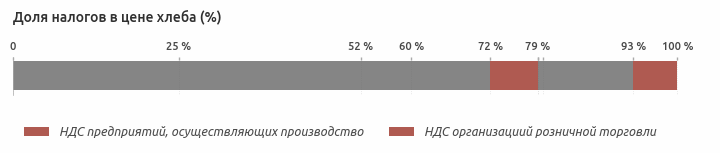

Images 'price-bread-structure-tax.png' and 'price-bread-structure-tax.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


In [43]:
columns_list = bread_structure_df.columns.tolist()
xticks = list(bread_structure.values())
xticks_cum = list(np.cumsum(xticks) - xticks)
xticks_cum.append(100)
xticks_labels = [str(int(round(x, 0))) + ' %' for x in xticks_cum]
xticks_labels[6:8] = ' ' * 2
xticks_labels[0] = '0'

fig = plt.figure(figsize=(9, 0.5))

zip_ = (columns_list, range(len(columns_list)))
for column, color in zip(*zip_):
    if column in [
        'НДС предприятий, осуществляющих производство', 
        'НДС организациий розничной торговли']:
        color = 1
        alpha = 1
        label = column
    else:
        color = 0
        alpha = 0.75
        label = None
        
    iloc_column = columns_list.index(column)
    previous_values_sum = bread_structure_df.iloc[:, :iloc_column].sum(axis=1)
    current_value = bread_structure_df[column].item()
    plt.barh(
        y=0.5, width=current_value, left=previous_values_sum,
        height=0.75, color=palette[color], alpha=alpha,
        label=label)
    
plt.xticks(xticks_cum, labels=xticks_labels, weight='medium', color=palette[-5])
plt.legend(
    loc='upper left', bbox_to_anchor=(0, -0.5),
    frameon=False, ncols=3, prop={'weight': 'normal', 'style': 'italic'})
plt.ylim(0, 1)
plt.yticks([])
plt.gca().xaxis.tick_top()
plt.gca().spines[['bottom']].set_visible(False)
plt.title('Доля налогов в цене хлеба (%)', pad=25)
plt.show()

savefig('price-bread-structure-tax', dir=save_plot_dir, dpi=100)
set_location()

#### Мясо

##### Говядина

In [44]:
animals_2021 = prices_food_2021['крупный рогатый скот'].copy()
animals_2022 = prices_food_2022['крупный рогатый скот'].copy()
animals_2023 = prices_food_2023['крупный рогатый скот'].copy()
animals_2024 = prices_food_2024['крупный рогатый скот'].copy()

In [45]:
animals =  pd.concat([
    animals_2021, animals_2022, animals_2023, animals_2024
], axis=0)

In [46]:
animals.index =  [to_date(x) for x in animals.index]

In [47]:
animals = 0.001 * animals

In [48]:
animals.tail()

2023-10-01    151.3500
2023-11-01    151.2990
2023-12-01    154.4170
2024-01-01    151.6512
2024-02-01    149.0890
Name: крупный рогатый скот, dtype: float64

In [49]:
beef_2021 = prices_food_2021_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2022 = prices_food_2022_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2023 = prices_food_2023_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2024 = prices_food_2024_consumers['говядина (кроме бескостного мяса), кг'].copy()

In [50]:
beef = pd.concat([
    beef_2021, beef_2022, beef_2023, beef_2024
], axis=0)

In [51]:
beef.index =  [to_date(x) for x in beef.index]

In [52]:
beef.tail()

2023-10-01    512.89
2023-11-01    515.55
2023-12-01    519.83
2024-01-01    527.89
2024-02-01    535.26
Name: говядина (кроме бескостного мяса), кг, dtype: object

In [53]:
beef_clean_2021 = prices_food_2021_consumers['говядина бескостная, кг'].copy()
beef_clean_2022 = prices_food_2022_consumers['говядина бескостная, кг'].copy()
beef_clean_2023 = prices_food_2023_consumers['говядина бескостная, кг'].copy()
beef_clean_2024 = prices_food_2024_consumers['говядина бескостная, кг'].copy()

In [54]:
beef_clean = pd.concat([
    beef_clean_2021, beef_clean_2022, beef_clean_2023, beef_clean_2024
], axis=0)

In [55]:
beef_clean.index =  [to_date(x) for x in beef_clean.index]

In [56]:
beef_clean.tail()

2023-10-01    694.97
2023-11-01    702.89
2023-12-01    709.79
2024-01-01    725.34
2024-02-01    734.32
Name: говядина бескостная, кг, dtype: object

Images 'price-beef.png' and 'price-beef.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


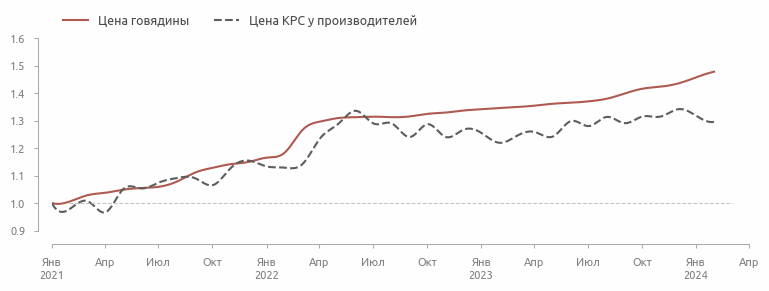

In [204]:
fig = plt.figure()
plt.plot(
    smoothed(normalized_by_first(beef), datetime_index=True), lw=1.5,
    color=palette[1], label='Цена говядины')
plt.plot(
    smoothed(normalized_by_first(animals), datetime_index=True),
    lw=1.5, ls='--', color=palette[0], label='Цена КРС у производителей')
ax=plt.gca()
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], zorder=10
)
plt.legend(**legend_inline, ncols=2, fontsize=9)
# plt.title('Нормализованная цена говядины', **title_inline)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_left=10, offset_bottom=10)

savefig('price-beef', dir=save_plot_dir, dpi=100)

In [58]:
set_location()

In [59]:
beef_price = normalized_by_first(beef/beef_clean).rename(columns={0: 'index'})

In [60]:
beef_price.tail()

,index
2023-10-01,1.042520
2023-11-01,1.036119
2023-12-01,1.034564
2024-01-01,1.028082
2024-02-01,1.029688


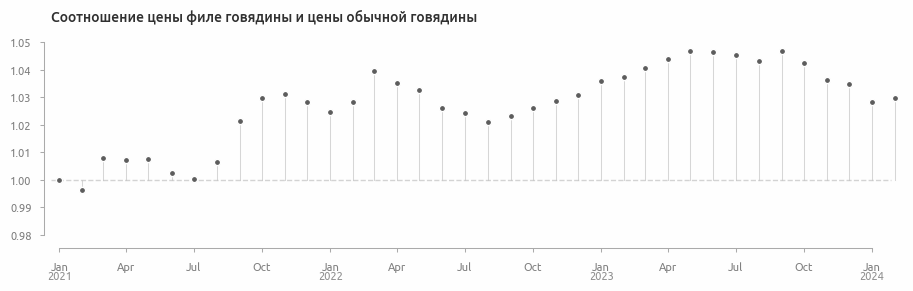

In [61]:
fig = plt.figure(figsize=(11, 2.5))
plt.scatter(x=beef_price.index, y=beef_price['index'], s=20, zorder=50)
for idx in beef_price.index:
    plt.plot(
        [idx, idx], [1, beef_price.loc[idx, 'index']],
        color=alpha_color(palette[0], 0.25), lw=0.75, zorder=1
    )
plt.axhline(
    1, 0, 0.985, lw=1, ls='--', color=palette[-2], alpha=0.75, zorder=10
)
plt.ylim(0.98, 1.05)
plt.title('Соотношение цены филе говядины и цены обычной говядины')

axis_rstyle(margin=0.01, offset_bottom=10)
axis_new_year(year_axis_pad=-0.16, language='rus')
set_location()

##### Свинина

In [62]:
pig_raw_2021 = prices_food_2021['свиньи'].copy()
pig_raw_2022 = prices_food_2022['свиньи'].copy()
pig_raw_2023 = prices_food_2023['свиньи'].copy()
pig_raw_2024 = prices_food_2024['свиньи'].copy()

In [63]:
pig_raw =  pd.concat([
    pig_raw_2021, pig_raw_2022, pig_raw_2023, pig_raw_2024
], axis=0)

In [64]:
pig_raw.index =  [to_date(x) for x in pig_raw.index]

In [65]:
pig_raw = 0.001 * pig_raw

In [66]:
pig_raw.tail()

2023-10-01    127.9350
2023-11-01    127.3500
2023-12-01    121.4530
2024-01-01    113.1215
2024-02-01    115.8620
Name: свиньи, dtype: float64

In [67]:
pig_clean_2021 = prices_food_2021_consumers['свинина бескостная, кг'].copy()
pig_clean_2022 = prices_food_2022_consumers['свинина бескостная, кг'].copy()
pig_clean_2023 = prices_food_2023_consumers['свинина бескостная, кг'].copy()
pig_clean_2024 = prices_food_2024_consumers['свинина бескостная, кг'].copy()

In [68]:
pig_clean = pd.concat([
    pig_clean_2021, pig_clean_2022, pig_clean_2023, pig_clean_2024
], axis=0)

In [69]:
pig_clean.index =  [to_date(x) for x in pig_clean.index]

In [70]:
pig_clean.tail()

2023-10-01    447.16
2023-11-01    452.03
2023-12-01    454.16
2024-01-01    452.61
2024-02-01    451.58
Name: свинина бескостная, кг, dtype: object

In [71]:
pig_2021 = prices_food_2021_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2022 = prices_food_2022_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2023 = prices_food_2023_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2024 = prices_food_2024_consumers['свинина (кроме бескостного мяса), кг'].copy()

In [72]:
pig = pd.concat([
    pig_2021, pig_2022, pig_2023, pig_2024
], axis=0)

In [73]:
pig.index = [to_date(x) for x in pig.index]

In [74]:
pig.tail()

2023-10-01    342.28
2023-11-01    344.82
2023-12-01    344.82
2024-01-01    342.72
2024-02-01    343.49
Name: свинина (кроме бескостного мяса), кг, dtype: object

Images 'price-pig.png' and 'price-pig.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


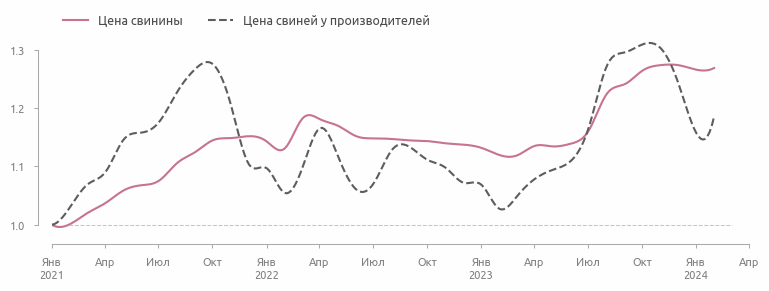

In [195]:
fig = plt.figure()
plt.plot(
    smoothed(normalized_by_first(pig), datetime_index=True), lw=1.5,
    color=alpha_color(palette[8], 1.15), label='Цена свинины'
)
plt.plot(
    smoothed(normalized_by_first(pig_raw), datetime_index=True),
    lw=1.5, ls='--', color=palette[0], label='Цена свиней у производителей'
)
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], zorder=10
)
plt.legend(**legend_inline, ncols=2)
# plt.title('Нормализованная цена свинины', **title_inline)
plt.gca().xaxis.grid(visible=True)
plt.gca().yaxis.grid(visible=False)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_left=10, yticks=[1, 1.31, 0.1], ylim=[0.99, 1.32])

savefig('price-pig', dir=save_plot_dir, dpi=100)

In [76]:
set_location()

In [77]:
pig_price = normalized_by_first(pig/pig_clean).rename(columns={0: 'index'})

In [78]:
pig_price.tail()

,index
2023-10-01,1.010464
2023-11-01,1.006995
2023-12-01,1.002272
2024-01-01,0.999580
2024-02-01,1.004111


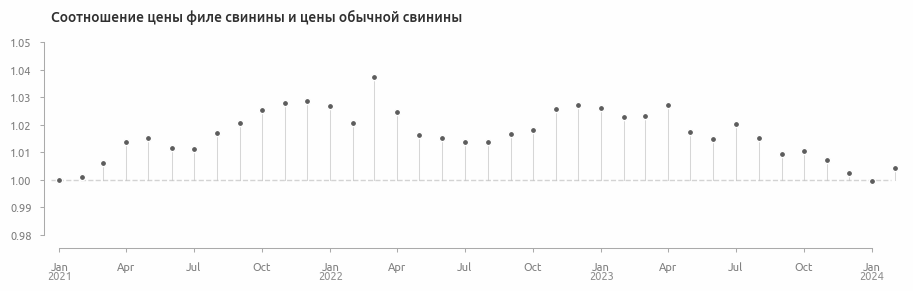

In [79]:
fig = plt.figure(figsize=(11, 2.5))
plt.scatter(x=pig_price.index, y=pig_price['index'], s=20, zorder=50)
for idx in pig_price.index:
    plt.plot(
        [idx, idx], [1, pig_price.loc[idx, 'index']],
        color=alpha_color(palette[0], 0.25), lw=0.75, zorder=1
    )
plt.axhline(
    1, 0, 0.985, lw=1, ls='--', color=palette[-2], alpha=0.75, zorder=10
)
plt.ylim(0.98, 1.05)
plt.title('Соотношение цены филе свинины и цены обычной свинины')
plt.grid(False)

axis_rstyle(margin=0.01, offset_bottom=10)
axis_new_year(year_axis_pad=-0.16, language='rus')
set_location()

##### Курица

In [80]:
poultry_2021_raw = prices_food_2021['птица сельскохозяйственная живая'].copy()
poultry_2022_raw = prices_food_2022['птица сельскохозяйственная живая'].copy()
poultry_2023_raw = prices_food_2023['птица сельскохозяйственная живая'].copy()
poultry_2024_raw = prices_food_2024['птица сельскохозяйственная живая'].copy()

In [81]:
poultry_raw =  pd.concat([
    poultry_2021_raw, poultry_2022_raw, poultry_2023_raw, poultry_2024_raw
], axis=0)

In [82]:
poultry_raw.index =  [to_date(x) for x in poultry_raw.index]

In [83]:
poultry_raw = 0.001 * poultry_raw

In [84]:
poultry_raw.tail()

2023-10-01    130.6750
2023-11-01    131.2530
2023-12-01    130.3250
2024-01-01    122.2456
2024-02-01    117.1568
Name: птица сельскохозяйственная живая, dtype: float64

In [85]:
poultry_2021 = prices_food_2021_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2022 = prices_food_2022_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2023 = prices_food_2023_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2024 = prices_food_2024_consumers['куры охлажденные и мороженые, кг'].copy()

In [86]:
poultry =  pd.concat([
    poultry_2021, poultry_2022, poultry_2023, poultry_2024
], axis=0)

In [87]:
poultry.index = [to_date(x) for x in poultry.index]

In [88]:
poultry.tail()

2023-10-01    229.65
2023-11-01    231.92
2023-12-01    227.58
2024-01-01    221.78
2024-02-01    219.11
Name: куры охлажденные и мороженые, кг, dtype: object

Images 'price-poultry.png' and 'price-poultry.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


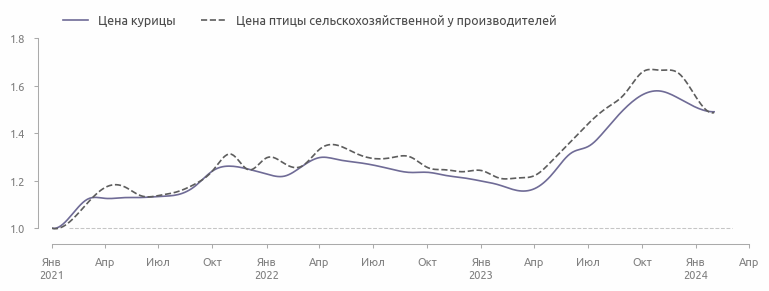

In [197]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(poultry), datetime_index=True),
    color=alpha_color(palette[7], 0.95),
    label='Цена курицы'
)
plt.plot(
    smoothed(normalized_by_first(poultry_raw), datetime_index=True), ls='--',
    label='Цена птицы сельскохозяйственной у производителей')
plt.axhline(1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], zorder=10)
plt.legend(**legend_inline, ncols=6)
# plt.title('Нормализованные цены на курицу', **title_inline)
plt.gca().xaxis.grid(visible=True)
plt.gca().yaxis.grid(visible=False)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(
    offset_left=10, offset_bottom=10,
    ylim=[0.99, 1.8], yticks=[1, 1.8, 0.2])

savefig('price-poultry', dir=save_plot_dir, dpi=100)

In [90]:
set_location()

#### Молочные продукты

##### Молоко

In [91]:
milk_2021_raw = prices_food_2021['молоко сырое крупного рогатого скота'].copy()
milk_2022_raw = prices_food_2022['молоко сырое крупного рогатого скота'].copy()
milk_2023_raw = prices_food_2023['молоко сырое крупного рогатого скота'].copy()
milk_2024_raw = prices_food_2024['молоко сырое крупного рогатого скота'].copy()

In [92]:
milk_raw =  pd.concat([
    milk_2021_raw, milk_2022_raw, milk_2023_raw, milk_2024_raw
], axis=0)

In [93]:
milk_raw.index =  [to_date(x) for x in milk_raw.index]

In [94]:
milk_raw = 0.001 * milk_raw

In [95]:
milk_raw.tail()

2023-10-01    30.5990
2023-11-01    32.0190
2023-12-01    32.7300
2024-01-01    33.7886
2024-02-01    34.3443
Name: молоко сырое крупного рогатого скота, dtype: float64

In [96]:
milk_2021 = \
    prices_food_2021_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2022 = \
    prices_food_2022_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2023 = \
    prices_food_2023_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2024 = \
    prices_food_2024_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()

In [97]:
milk = pd.concat([
    milk_2021, milk_2022, milk_2023, milk_2024
], axis=0)

In [98]:
milk.index = [to_date(x) for x in milk.index]

In [99]:
milk.tail()

2023-10-01    73.89
2023-11-01     74.6
2023-12-01    75.26
2024-01-01    76.08
2024-02-01    76.69
Name: молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л, dtype: object

##### Сыр

In [100]:
cheese_2021 = prices_food_2021_consumers['сыры сычужные твердые и мягкие, кг'].copy()
cheese_2022 = prices_food_2022_consumers['сыры сычужные твердые и мягкие, кг'].copy()
cheese_2023 = prices_food_2023_consumers['сыры твердые, полутвердые и мягкие, кг'].copy()
cheese_2024 = prices_food_2024_consumers['сыры твердые, полутвердые и мягкие, кг'].copy()

In [101]:
cheese =  pd.concat([
    cheese_2021, cheese_2022, cheese_2023, cheese_2024
], axis=0)

In [102]:
cheese.index =  [to_date(x) for x in cheese.index]

In [103]:
cheese.tail()

2023-10-01     763.7
2023-11-01    769.96
2023-12-01    780.06
2024-01-01    781.47
2024-02-01    782.77
dtype: object

##### Сметана

In [104]:
sour_cream_2021 = prices_food_2021_consumers['сметана, кг'].copy()
sour_cream_2022 = prices_food_2022_consumers['сметана, кг'].copy()
sour_cream_2023 = prices_food_2023_consumers['сметана, кг'].copy()
sour_cream_2024 = prices_food_2024_consumers['сметана, кг'].copy()

In [105]:
sour_cream =  pd.concat([
    sour_cream_2021, sour_cream_2022, sour_cream_2023, sour_cream_2024
], axis=0)

In [106]:
sour_cream.index = [to_date(x) for x in sour_cream.index]

In [107]:
sour_cream.tail()

2023-10-01    277.85
2023-11-01    279.63
2023-12-01    282.49
2024-01-01    285.58
2024-02-01    287.97
Name: сметана, кг, dtype: object

##### Йогурт

In [108]:
jogurt_2021 = prices_food_2021_consumers['йогурт, 125 г'].copy()
jogurt_2022 = prices_food_2022_consumers['йогурт, кг'].copy()
jogurt_2023 = prices_food_2023_consumers['йогурт, кг'].copy()
jogurt_2024 = prices_food_2024_consumers['йогурт, кг'].copy()

In [109]:
# transform 0.125 kg of 2021 prices to 1 kg as in 2022 and 2023 price
jogurt_2021 = jogurt_2021 / 0.125

In [110]:
jogurt =  pd.concat([
    jogurt_2021, jogurt_2022, jogurt_2023, jogurt_2024
], axis=0)

In [111]:
jogurt.index = [to_date(x) for x in jogurt.index]

In [112]:
jogurt.tail()

2023-10-01    278.24
2023-11-01    278.46
2023-12-01    279.45
2024-01-01    280.62
2024-02-01    283.18
dtype: object

##### Масло сливочное

In [113]:
butter_2021 = prices_food_2021_consumers['масло сливочное, кг'].copy()
butter_2022 = prices_food_2022_consumers['масло сливочное, кг'].copy()
butter_2023 = prices_food_2023_consumers['масло сливочное, кг'].copy()
butter_2024 = prices_food_2024_consumers['масло сливочное, кг'].copy()

In [114]:
butter =  pd.concat([
    butter_2021, butter_2022, butter_2023, butter_2024
], axis=0)

In [115]:
butter.index = [to_date(x) for x in butter.index]

In [116]:
butter.tail()

2023-10-01    835.23
2023-11-01    848.51
2023-12-01    862.87
2024-01-01    876.33
2024-02-01    886.56
Name: масло сливочное, кг, dtype: object

##### Творог

В 2022 году изменилась номенклатура: 'творог жирный' и 'творог нежирный' заменем одним показателем - 'творог'.  
Данные для 2021 года считаются как среднее от 'творог жирный' и 'творог нежирный'.

In [168]:
# mean of pd.Series using Numpy
cottage_cheese_2021 = pd.concat(
    [prices_food_2021_consumers['творог нежирный, кг'],
     prices_food_2021_consumers['творог жирный, кг']],
    axis=1).agg('mean', 1)

cottage_cheese_2022 = prices_food_2022_consumers['творог, кг'].copy()
cottage_cheese_2023 = prices_food_2023_consumers['творог, кг'].copy()
cottage_cheese_2024 = prices_food_2024_consumers['творог, кг'].copy()

In [118]:
cottage_cheese =  pd.concat([
    cottage_cheese_2021, cottage_cheese_2022, cottage_cheese_2023, cottage_cheese_2024
], axis=0)

In [119]:
cottage_cheese.index = [to_date(x) for x in cottage_cheese.index]

In [120]:
cottage_cheese.tail()

2023-10-01    406.52
2023-11-01    409.32
2023-12-01    411.09
2024-01-01    413.44
2024-02-01    414.34
dtype: object

##### Plots

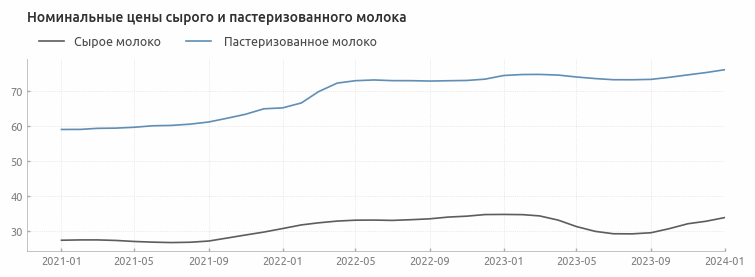

In [121]:
plt.plot(milk_raw, label='Сырое молоко')
plt.plot(milk, label=' Пастеризованное молоко', color=palette[2])
# plt_date_format(language='rus', case='capital')
plt.legend(**legend_inline, ncols=2)
plt.title('Номинальные цены сырого и пастеризованного молока', **title_inline)
plt.xlim(right=dt.datetime.strptime('01-01-2024', '%d-%m-%Y'))
plt.show()

Images 'price-milk-products.png' and 'price-milk-products.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


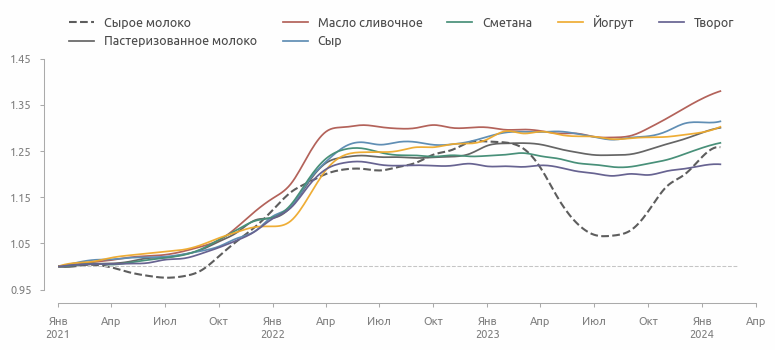

In [199]:
plots_lw = 1.25
fig = plt.figure(figsize=(9, 3))

plt.plot(
    smoothed(normalized_by_first(milk_raw), datetime_index=True), lw=1.5, ls='--',
    color=palette[0], label='Сырое молоко')
plt.plot(
    smoothed(normalized_by_first(milk), datetime_index=True),
    lw=plots_lw, alpha=0.95, label='Пастеризованное молоко')
plt.plot(
    smoothed(normalized_by_first(butter), datetime_index=True),
    lw=plots_lw, alpha=0.95, label='Масло сливочное')
plt.plot(
    smoothed(normalized_by_first(cheese), datetime_index=True),
    lw=plots_lw, alpha=1, label='Сыр')
plt.plot(
    smoothed(normalized_by_first(sour_cream), datetime_index=True), 
    lw=plots_lw, label='Сметана')
plt.plot(
    smoothed(normalized_by_first(jogurt), datetime_index=True),
    lw=plots_lw, alpha=0.95, label='Йогрут')
plt.plot(
    smoothed(normalized_by_first(cottage_cheese), datetime_index=True),
    lw=plots_lw, label='Творог', color=palette[7])
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], zorder=10
)
plt.legend(**legend_inline, ncols=5)
# plt.title(
    # label='Нормализованные цены на сырое молоко и молочные продукты', pad=40)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_left=10, yticks=[0.95, 1.45, 0.1])

savefig('price-milk-products', dir=save_plot_dir, dpi=100)

In [123]:
set_location()

#### Овощи

In [124]:
vegetables_2021_raw = prices_food_2021['овощи'].copy()
vegetables_2022_raw = prices_food_2022['овощи'].copy()
vegetables_2023_raw = prices_food_2023['овощи'].copy()
vegetables_2024_raw = prices_food_2024['овощи'].copy()

In [125]:
vegetables_raw =  pd.concat([
    vegetables_2021_raw, vegetables_2022_raw, vegetables_2023_raw, vegetables_2024_raw
], axis=0)

In [126]:
vegetables_raw.index =  [to_date(x) for x in vegetables_raw.index]

In [127]:
vegetables_raw = 0.001 * vegetables_raw

In [128]:
vegetables_raw.tail()

2023-10-01     50.6760
2023-11-01     79.2880
2023-12-01    110.1000
2024-01-01    127.8889
2024-02-01    136.4069
Name: овощи, dtype: float64

In [129]:
potato_2021_raw = prices_food_2021['картофель'].copy()
potato_2022_raw = prices_food_2022['картофель'].copy()
potato_2023_raw = prices_food_2023['картофель'].copy()
potato_2024_raw = prices_food_2024['картофель'].copy()

In [130]:
potato_raw =  pd.concat([
    potato_2021_raw, potato_2022_raw, potato_2023_raw, potato_2024_raw
], axis=0)

In [131]:
potato_raw.index =  [to_date(x) for x in potato_raw.index]

In [132]:
potato_raw = 0.001 * potato_raw

In [133]:
potato_raw.tail()

2023-10-01    11.2850
2023-11-01    11.8860
2023-12-01    11.6030
2024-01-01    13.0447
2024-02-01    13.7784
Name: картофель, dtype: float64

In [134]:
potato_2021 = prices_food_2021_consumers['картофель, кг'].copy()
potato_2022 = prices_food_2022_consumers['картофель, кг'].copy()
potato_2023 = prices_food_2023_consumers['картофель, кг'].copy()
potato_2024 = prices_food_2024_consumers['картофель, кг'].copy()

In [135]:
potato =  pd.concat([
    potato_2021, potato_2022, potato_2023, potato_2024
], axis=0)

In [136]:
potato.index =  [to_date(x) for x in potato.index]

In [137]:
potato.tail()

2023-10-01    27.82
2023-11-01    27.61
2023-12-01    28.04
2024-01-01    29.93
2024-02-01    30.38
Name: картофель, кг, dtype: object

In [138]:
cucumber_2021 = prices_food_2021_consumers['огурцы свежие, кг'].copy()
cucumber_2022 = prices_food_2022_consumers['огурцы свежие, кг'].copy()
cucumber_2023 = prices_food_2023_consumers['огурцы свежие, кг'].copy()
cucumber_2024 = prices_food_2024_consumers['огурцы свежие, кг'].copy()

In [139]:
cucumber =  pd.concat([
    cucumber_2021, cucumber_2022, cucumber_2023, cucumber_2024
], axis=0)

In [140]:
cucumber.index =  [to_date(x) for x in cucumber.index]

In [141]:
cucumber.tail()

2023-10-01    108.75
2023-11-01    147.68
2023-12-01    209.36
2024-01-01    253.33
2024-02-01    275.78
Name: огурцы свежие, кг, dtype: object

In [142]:
tomato_2021 = prices_food_2021_consumers['помидоры свежие, кг'].copy()
tomato_2022 = prices_food_2022_consumers['помидоры свежие, кг'].copy()
tomato_2023 = prices_food_2023_consumers['помидоры свежие, кг'].copy()
tomato_2024 = prices_food_2024_consumers['помидоры свежие, кг'].copy()

In [143]:
tomato =  pd.concat([
    tomato_2021, tomato_2022, tomato_2023, tomato_2024
], axis=0)

In [144]:
tomato.index =  [to_date(x) for x in tomato.index]

In [145]:
tomato.tail()

2023-10-01    175.64
2023-11-01    209.81
2023-12-01    222.09
2024-01-01    246.99
2024-02-01    259.41
Name: помидоры свежие, кг, dtype: object

In [146]:
onion_2021 = prices_food_2021_consumers['лук репчатый, кг'].copy()
onion_2022 = prices_food_2022_consumers['лук репчатый, кг'].copy()
onion_2023 = prices_food_2023_consumers['лук репчатый, кг'].copy()
onion_2024 = prices_food_2024_consumers['лук репчатый, кг'].copy()

In [147]:
onion =  pd.concat([
    onion_2021, onion_2022, onion_2023, onion_2024
], axis=0)

In [148]:
onion.index =  [to_date(x) for x in onion.index]

In [149]:
onion.tail()

2023-10-01    32.72
2023-11-01    33.46
2023-12-01    34.44
2024-01-01    37.13
2024-02-01     38.6
Name: лук репчатый, кг, dtype: object

In [150]:
carrot_2021 = prices_food_2021_consumers['морковь, кг'].copy()
carrot_2022 = prices_food_2022_consumers['морковь, кг'].copy()
carrot_2023 = prices_food_2023_consumers['морковь, кг'].copy()
carrot_2024 = prices_food_2024_consumers['морковь, кг'].copy()

In [151]:
carrot =  pd.concat([
    carrot_2021, carrot_2022, carrot_2023, carrot_2024
], axis=0)

In [152]:
carrot.index =  [to_date(x) for x in carrot.index]

In [153]:
carrot.tail()

2023-10-01    41.89
2023-11-01    41.25
2023-12-01    42.31
2024-01-01    46.13
2024-02-01    48.43
Name: морковь, кг, dtype: object

Images 'price-vegetables.png' and 'price-vegetables.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


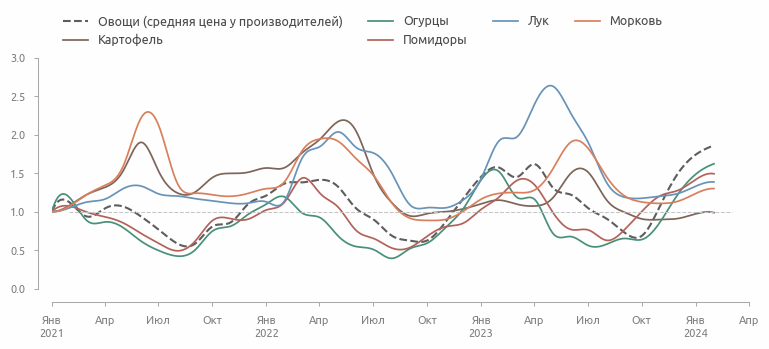

In [200]:
plots_lw = 1.25
fig = plt.figure(figsize=(9, 3))

plt.plot(
    smoothed(normalized_by_first(vegetables_raw), datetime_index=True), lw=1.5, ls='--',
    color=palette[0], label='Овощи (средняя цена у производителей)')
plt.plot(
    smoothed(normalized_by_first(potato), datetime_index=True),
    lw=plots_lw, color=alpha_color(palette[5], 0.95), label='Картофель')
plt.plot(
    smoothed(normalized_by_first(cucumber), datetime_index=True),
    lw=plots_lw, color=alpha_color(palette[3], 1), label='Огурцы')
plt.plot(
    smoothed(normalized_by_first(tomato), datetime_index=True),
    lw=plots_lw, color=alpha_color(palette[1], 0.95), label='Помидоры')
plt.plot(
    smoothed(normalized_by_first(onion), datetime_index=True),
    lw=plots_lw, color=alpha_color(palette[2], 0.95), label='Лук')
plt.plot(
    smoothed(normalized_by_first(carrot), datetime_index=True),
    lw=plots_lw, color=alpha_color(palette[9], 0.95), label='Морковь')
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], zorder=10
)
plt.legend(**legend_inline, ncols=4)
# plt.title('Нормализованные цены на овощи', **title_inline)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_left=10, ylim=[0, 3], yticks=[0, 3])

savefig('price-vegetables', dir=save_plot_dir, dpi=100)

In [155]:
set_location()

#### Яйца куриные

In [156]:
eggs_2021_raw = prices_food_2021['яйца куриные в скорлупе свежие'].copy()
eggs_2022_raw = prices_food_2022['яйца куриные в скорлупе свежие'].copy()
eggs_2023_raw = prices_food_2023['яйца куриные в скорлупе свежие'].copy()
eggs_2024_raw = prices_food_2024['яйца куриные в скорлупе свежие'].copy()

In [157]:
eggs_raw =  pd.concat([
    eggs_2021_raw, eggs_2022_raw, eggs_2023_raw, eggs_2024_raw
], axis=0)

In [158]:
eggs_raw.index =  [to_date(x) for x in eggs_raw.index]

In [159]:
# eggs price from 1000 eggs to 10 eggs
eggs_raw = 0.01 * eggs_raw

In [160]:
eggs_raw.head()

2021-01-01    57.45
2021-02-01    57.49
2021-03-01    60.99
2021-04-01    67.53
2021-05-01    61.62
Name: яйца куриные в скорлупе свежие, dtype: float64

In [161]:
eggs_2021 = prices_food_2021_consumers['яйца куриные, 10 шт.'].copy()
eggs_2022 = prices_food_2022_consumers['яйца куриные, 10 шт.'].copy()
eggs_2023 = prices_food_2023_consumers['яйца куриные, 10 шт.'].copy()
eggs_2024 = prices_food_2024_consumers['яйца куриные, 10 шт.'].copy()

In [162]:
eggs =  pd.concat([
    eggs_2021, eggs_2022, eggs_2023, eggs_2024
], axis=0)

In [163]:
eggs.index =  [to_date(x) for x in eggs.index]

In [164]:
eggs.tail()

2023-10-01     97.13
2023-11-01    111.87
2023-12-01    132.45
2024-01-01    130.06
2024-02-01    129.17
Name: яйца куриные, 10 шт., dtype: object

Images 'price-eggs.png' and 'price-eggs.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


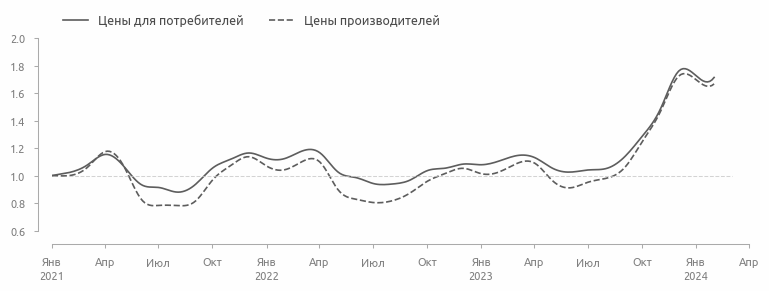

In [190]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(eggs), datetime_index=True),
    color=palette[0],
    label='Цены для потребителей'
)
plt.plot(
    smoothed(normalized_by_first(eggs_raw), datetime_index=True), ls='--',
    label='Цены производителей'
)
plt.axhline(
    1, 0.025, 0.975, lw=0.75, ls='--', color=palette[-2], alpha=0.75, zorder=10
)
plt.legend(**legend_inline, ncols=6)
# plt.title('Нормализованные цены на яйца', **title_inline)

axis_date_transform(
    formatter=matplotlib.dates.DateFormatter('%b'),
    locator=matplotlib.dates.MonthLocator([1,4,7,10]))
axis_dates_capitalize()
axis_add_date_xaxis(offset=25)
axis_dates_translate_months()

plt.xlim(xlim)
axis_rstyle(offset_bottom=10, offset_left=10)

savefig('price-eggs', dir=save_plot_dir, dpi=100)

In [166]:
set_location()

### Execution time

In [167]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:34
